# P2: Determination of the Magnetic Field of the Earth by Stewart and Gee's method.


In [65]:
import numpy as np 
import matplotlib.pyplot as plt

In [66]:
# input left and right readings and the values of radius and stuff, code ll take care of rest

# distances from center of ring
x = np.array([
  0, 0.03, 0.06, 0.09, 0.12, 0.15
])

left_theta = np.array([
  59.75, 55.5, 47.75, 35.5, 24.75, 16
])

right_theta = np.array([
  59.75, 55.5, 47.75, 35.5, 24.75, 16
])

theta = (left_theta+right_theta)/2

tan_theta = np.tan(np.deg2rad(theta))

turns = 50

current = 0.2

# take 3 values and mean them
radius = np.array([
  0.1025
])

mean_radius = np.mean(radius)

mu0 = 4*np.pi*1e-7

In [67]:
def B(x, radius, current):
  return mu0*current*turns*radius**2/(2*(radius**2 + x**2)**(3/2))

def line(x, m, c):
    return m * x + c

def invline(y, m, c):
    return (y - c) / m

def least_squares(x, y):
    m = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / (len(x) * np.sum(x**2) - np.sum(x)**2)
    c = (np.sum(y) - m * np.sum(x)) / len(x)
    return m, c

In [68]:
print(B(x, mean_radius, current))

[6.12993689e-05 5.41892662e-05 3.94012713e-05 2.60099383e-05
 1.67944229e-05 1.10086312e-05]


In [69]:
minus_logB = -np.log(B(x, mean_radius, current))
minus_logx2r2 = -np.log(x**2 + mean_radius**2)

m, c = least_squares(minus_logx2r2, minus_logB)

print(f"m = {m}, c = {c}")

m = -1.5, c = 16.53341845236228


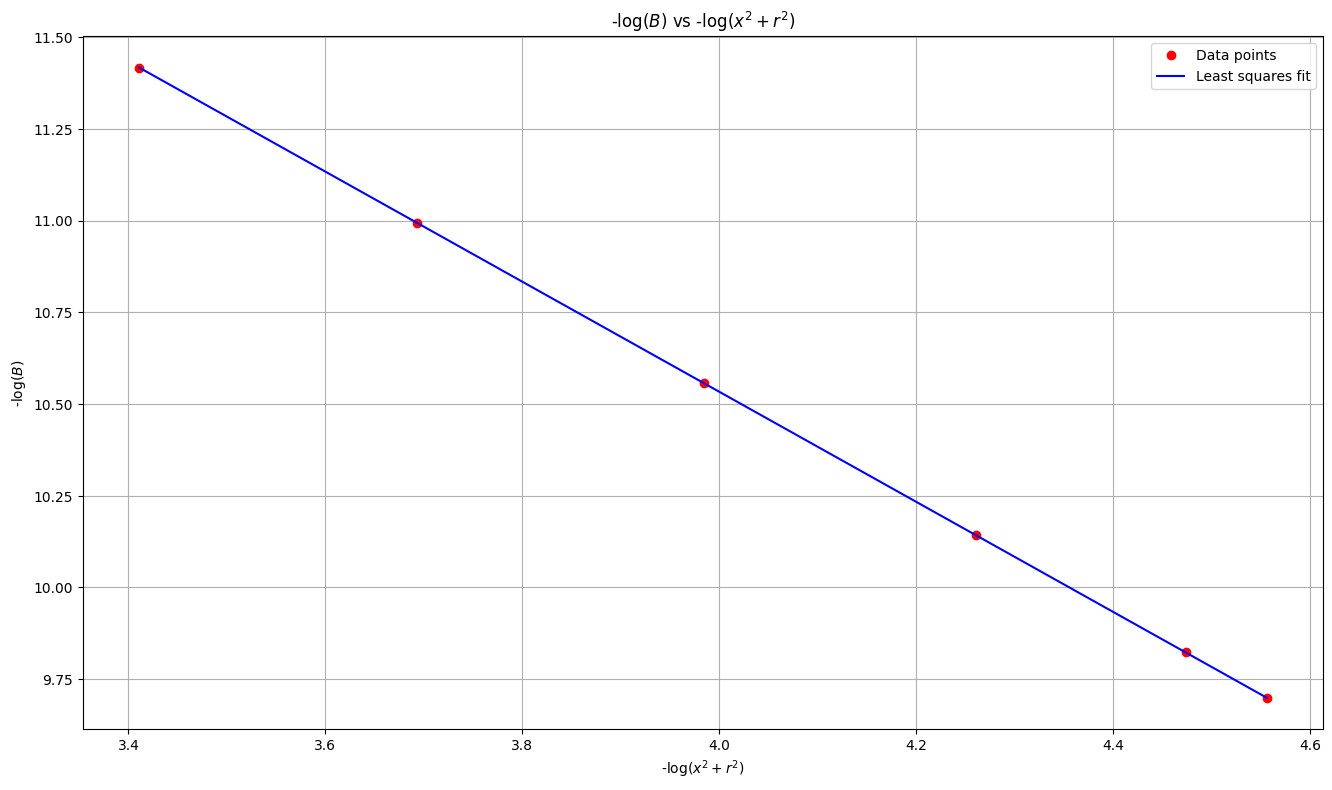

In [70]:
plt.figure(figsize=(16, 9)) 

plt.plot(minus_logx2r2, minus_logB, 'ro', label='Data points')
plt.plot(minus_logx2r2, line(minus_logx2r2, m, c), 'b-', label='Least squares fit')

plt.title(r"-$\log(B)$ vs -$\log(x^2 + r^2)$")
plt.xlabel(r"-$\log(x^2 + r^2)$")
plt.ylabel(r"-$\log(B)$")

plt.legend()
plt.grid()
plt.show()